Based on "Multifractal correlations in natural language written texts: Effects of language family and long word statistics"
M. Chatzigeorgiou, V. Constantoudis, F. Diakonos, K. Karamanos, C. Papadimitriou, M. Kalimeri, H. Papageorgiou

In [21]:
from helpers.FileUtils import read_txt_file
text = read_txt_file('achristmascarol_textonly')
#print(text)

In [22]:
from helpers.TextManipulations import perform_text_preprocessing
text_cleaned = perform_text_preprocessing(text)
#print(text_cleaned)

In [23]:
from helpers.TextManipulations import tokenize_text
token_words = tokenize_text(text_cleaned)
#print(token_words)

In [24]:
from helpers.TimeSeries import construct_lts_from_tokens
lts = construct_lts_from_tokens(token_words)
#print(lts)

In [25]:
from helpers.TimeSeries import calculate_cumulative_means
x, ccm = calculate_cumulative_means(lts)

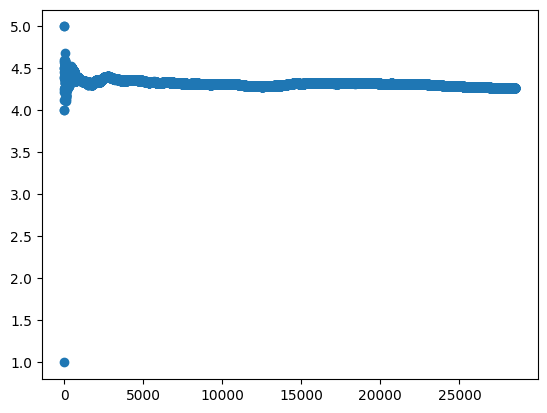

In [26]:
from helpers.PlotUtils import plot_x_vs_y
plot_x_vs_y(x, ccm)

In [27]:
from helpers.TimeSeries import calculate_cumulative_variances
x, ccv = calculate_cumulative_variances(lts)

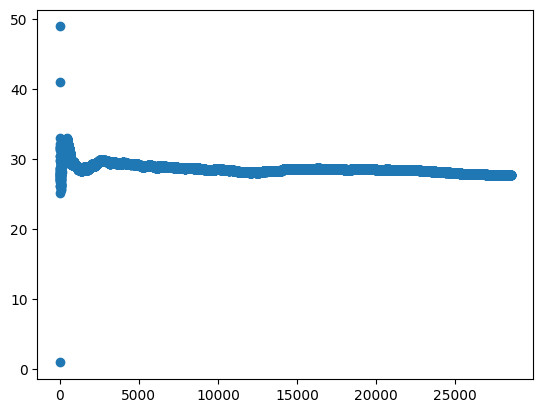

In [28]:
from helpers.PlotUtils import plot_x_vs_y
plot_x_vs_y(x, ccv)

In [29]:
from helpers.TimeSeries import calculate_cumulative_skewness
x, ccs = calculate_cumulative_skewness(lts)

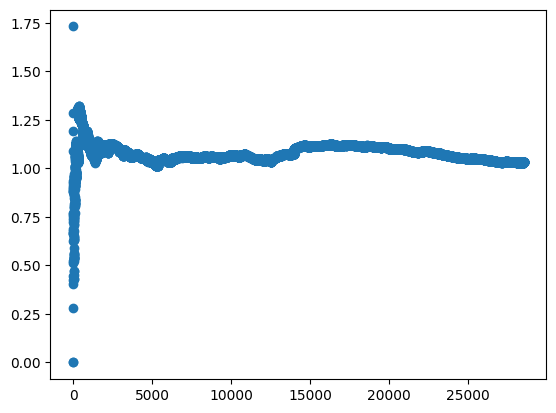

In [30]:
from helpers.PlotUtils import plot_x_vs_y
plot_x_vs_y(x, ccs)

In [31]:
from helpers.TimeSeries import calculate_cumulative_kurtosis
x, cck = calculate_cumulative_kurtosis(lts)

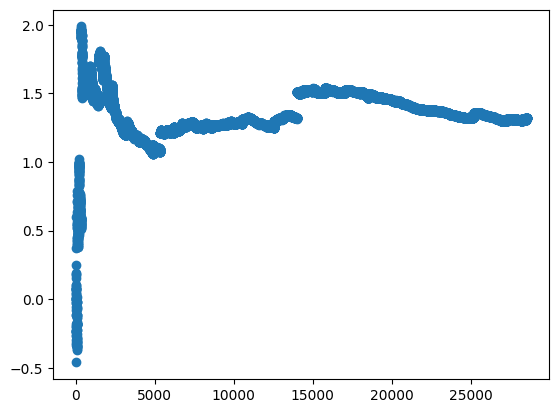

In [32]:
from helpers.PlotUtils import plot_x_vs_y
plot_x_vs_y(x, cck)

Plots indicate that series is not stationary. Proposed algorithm - Box Counting is not suitable. It is presented for future purposes.

In [33]:
segments = [10, 30, 50, 100, 150, 200, 250, 500, 700, 1000]
qs = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [34]:
from algorithms.BoxCounting.BoxCounting import perform_boxcounting
qs, ds = perform_boxcounting(lts, segments, qs)

In [35]:
print(qs)
print(ds)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1.0277777069345182, 1.024829840664915, 1.0220277899630203, 1.019371538301091, 1.0168508125370368, 1.0144489490815034, 1.0121464779067373, 1.0099237257295, 1.0077623275375471, 1.0056458592546433, 1.0035598895828592, 0.9994299162035026, 0.9973639892667756, 0.9952839096886449, 0.9931799169301566, 0.9910424477152071, 0.9888623237447097, 0.9866312355668964, 0.9843425310795706, 0.9819922415292464]


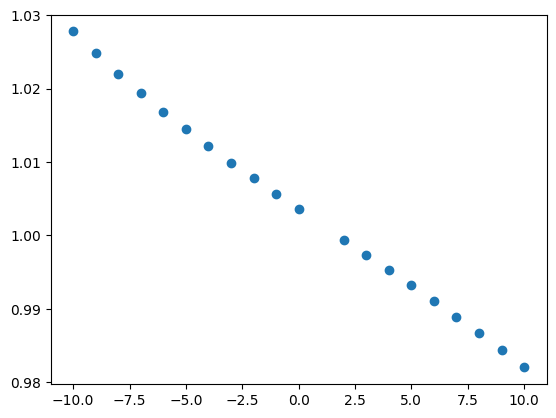

In [36]:
from helpers.PlotUtils import plot_x_vs_y
plot_x_vs_y(qs, ds)

Shuffle the data

In [37]:
from helpers.TimeSeries import shuffle
lts_shuffled = shuffle(lts)
#print(lts_shuffled)

In [38]:
from algorithms.BoxCounting.BoxCounting import perform_boxcounting
qs, ds = perform_boxcounting(lts_shuffled, segments, qs)

In [39]:
print(qs)
print(ds)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1.026940756190146, 1.0246079062349962, 1.0222585776601105, 1.0198996987109241, 1.0175375459719473, 1.0151776626302291, 1.0128248683534689, 1.0104833286021997, 1.0081566452980815, 1.0058479368763993, 1.0035598895828592, 0.9990544627046106, 0.9968403899168824, 0.9946535988617201, 0.9924947633336406, 0.9903642669446219, 0.9882623134512092, 0.9861890631909552, 0.9841447810372511, 0.9821299775401323]
